## Observations and Insights 

In [410]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata.head()

# Combine the data into a single dataset
combined = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
combined.shape
combined.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [411]:
# Checking the number of mice.
mice_number = len(combined["Mouse ID"].value_counts())
mice_number

249

In [412]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combined.loc[combined.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicates

array(['g989'], dtype=object)

In [413]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse = combined.loc[combined["Mouse ID"] == "g989"]
dup_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [414]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Don't know which is the reliable data so dropping whole mouse
filter_df = combined.loc[:, "Mouse ID"].isin(duplicates)==False
cleandf = combined.loc[filter_df, :]
cleandf

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [415]:
# Checking the number of mice in the clean DataFrame.
newnum = len(cleandf["Mouse ID"].value_counts())
newnum

248

## Summary Statistics

In [416]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = cleandf.groupby(["Drug Regimen"]).mean()
median = cleandf.groupby(["Drug Regimen"]).median()
variance = cleandf.groupby(["Drug Regimen"]).var()
stdev = cleandf.groupby(["Drug Regimen"]).std()
sem = cleandf.groupby(["Drug Regimen"]).sem()

stats = pd.DataFrame({"Mean":mean['Tumor Volume (mm3)'],
                     "Median":median['Tumor Volume (mm3)'],
                     "Variance":variance['Tumor Volume (mm3)'],
                     "Standard Deviation":stdev['Tumor Volume (mm3)'],
                     "SEM":sem['Tumor Volume (mm3)']})
stats
# This method is the most straighforward, creating multiple series and putting them all together at the end.

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [417]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped = cleandf.groupby(["Drug Regimen"])
grouped_stats = pd.DataFrame(grouped['Tumor Volume (mm3)'].agg({'mean', 'median', 'var', 'std', 'sem'}))
grouped_stats
# This method produces everything in a single groupby function

,var,sem,mean,std,median
Drug Regimen,,,,,
Capomulin,24.947764,0.329346,40.675741,4.994774,41.557809
Ceftamin,39.290177,0.469821,52.591172,6.268188,51.776157
Infubinol,43.128684,0.492236,52.884795,6.567243,51.820584
Ketapril,68.553577,0.603860,55.235638,8.279709,53.698743
Naftisol,66.173479,0.596466,54.331565,8.134708,52.509285
Placebo,61.168083,0.581331,54.033581,7.821003,52.288934
Propriva,43.852013,0.544332,52.320930,6.622085,50.446266
Ramicane,23.486704,0.320955,40.216745,4.846308,40.673236
Stelasyn,59.450562,0.573111,54.233149,7.710419,52.431737


## Bar and Pie Charts

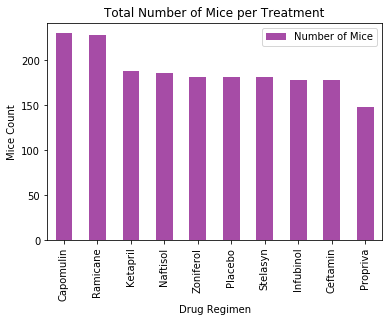

In [418]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
bars = cleandf["Drug Regimen"].value_counts()

bplot1 = bars.plot(kind='bar', color='purple', alpha=0.7, label='Number of Mice', legend=True)
bplot1.set_xlabel('Drug Regimen')
bplot1.set_ylabel('Mice Count')
bplot1.set_title('Total Number of Mice per Treatment')
bplot1

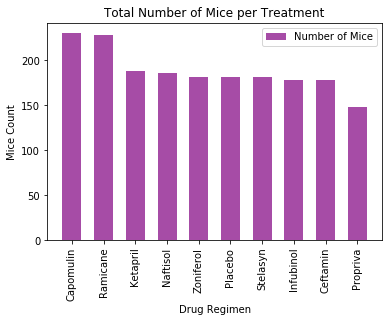

In [419]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
counts = cleandf["Drug Regimen"].value_counts()

plt.bar(counts.index.values, counts.values, color='purple', alpha=0.7, width=0.6, label='Number of Mice')
plt.xticks(rotation='vertical')
plt.title('Total Number of Mice per Treatment')
plt.xlabel('Drug Regimen')
plt.ylabel('Mice Count')
plt.legend()
plt.show()

Text(0, 0.5, ' ')

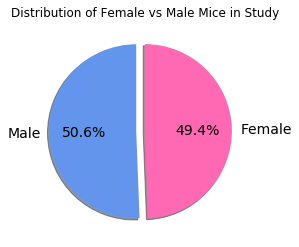

In [420]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
distribution = combined["Sex"].value_counts()

plotpanda = distribution.plot(kind='pie', autopct='%1.1f%%', fontsize=14, startangle=90, explode=(0.1, 0), shadow=True, colors = ['cornflowerblue','hotpink'])
plotpanda.set_title('Distribution of Female vs Male Mice in Study')
plotpanda.set_ylabel(' ')


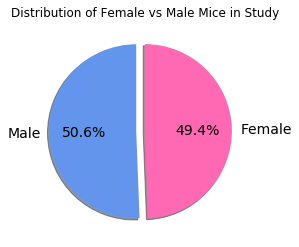

In [421]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
distribution = combined["Sex"].value_counts()
labels = ["Male", "Female"]

plt.pie(distribution, autopct='%1.1f%%', startangle=90, explode=(0.1, 0), shadow=True, colors = ['cornflowerblue','hotpink'], labels=labels, textprops={'fontsize': 14})
plt.title('Distribution of Female vs Male Mice in Study')
plt.show()

## Quartiles, Outliers and Boxplots

In [422]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
maxtime=cleandf.loc[:, ['Mouse ID','Timepoint']].groupby('Mouse ID').max()
maxtime

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
finaldf=pd.merge(maxtime, cleandf, on=['Mouse ID','Timepoint'], how='left')
finaldf.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [423]:
# Put treatments into a list for for loop (and later for plot labels)
drug = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
plot_tumvol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for each_drug in drug:    
    #filter by drug type
    filterdf = finaldf.loc[:, "Drug Regimen"]==each_drug
    #assign quantiles
    quantiles = [.25, .5, .75]
    #create new DF based on fileter with only Tum Vol column
    onedrug= finaldf.loc[filterdf, "Tumor Volume (mm3)"]
    #append the above empty list
    plot_tumvol.append(onedrug)
    #assign quartiles
    quartiles = onedrug.quantile(quantiles)
    
    #plot part calculations
    lowerq =quartiles.loc[.25]
    upperq=quartiles.loc[.75]
    iqr=upperq-lowerq
    lowerb=lowerq-(1.5*iqr)
    upperb=upperq+(1.5*iqr)

    # Locate the rows which contain mice on each drug and get the tumor volumes
    # Determine outliers using upper and lower bounds
    filterdf2 = (onedrug>upperb) | (onedrug<lowerb)
    outliers = len(onedrug.loc[filterdf2])
    print(f"There are {outliers} outliers for {each_drug}")
    

There are 0 outliers for Capomulin
There are 0 outliers for Ramicane
There are 1 outliers for Infubinol
There are 0 outliers for Ceftamin


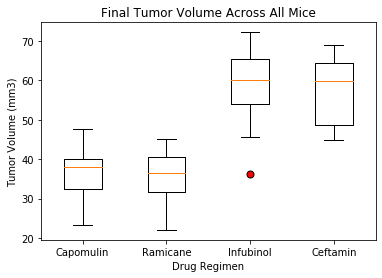

In [424]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
outlierc=dict(markerfacecolor='r', markersize=7)

plt.boxplot(plot_tumvol, labels=drug, flierprops=outlierc)
plt.title('Final Tumor Volume Across All Mice')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.show()

## Line and Scatter Plots

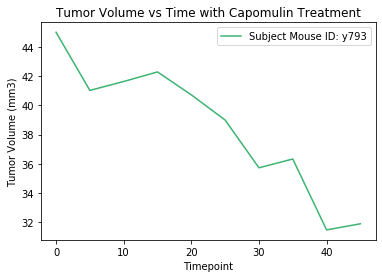

In [425]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_mousy = cleandf[cleandf['Drug Regimen'] == 'Capomulin']

mousy = cap_mousy[cap_mousy['Mouse ID']=='y793']
mousyplot = mousy[['Timepoint','Tumor Volume (mm3)']]

mousyplot.plot.line(x='Timepoint', color='mediumseagreen', legend=False)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs Time with Capomulin Treatment')
plt.legend([(f'Subject Mouse ID: y793')], loc='best')
plt.show()

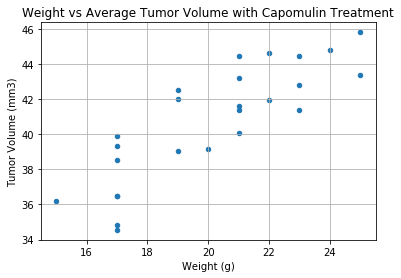

In [426]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#Filter cap df from above to contain what we need 
scatter_mousy = cap_mousy.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
#Group to find average tumor vol
group_mousy = scatter_mousy.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()
group_mousy = pd.DataFrame(group_mousy).reset_index()

capplot = group_mousy.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid=True)
capplot.set_title("Weight vs Average Tumor Volume with Capomulin Treatment")
capplot

## Correlation and Regression

The correlation coefficient is 0.84.
The r-squared value is 0.7089.
The equation of the regression line is y = 0.95x + 21.55.


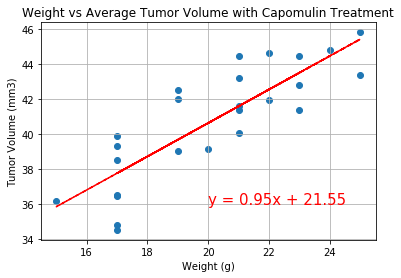

In [427]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress

x_values = group_mousy["Weight (g)"]
y_values = group_mousy["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

cod =round(rvalue**2, 4)
corr_coeff = round(st.pearsonr(x_values,y_values)[0], 2)

plt.scatter(x_values, y_values)
plt.grid(which="both")
plt.plot(x_values, regress_values, "r--")
plt.annotate(line_eq, (20,36), fontsize=15, color ='r')
plt.title("Weight vs Average Tumor Volume with Capomulin Treatment")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

print(f'The correlation coefficient is {corr_coeff}.')
print(f'The r-squared value is {cod}.')
print(f'The equation of the regression line is {line_eq}.')